LIGHTGMB
Pembagian Dataset 70/30

In [ ]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import time
import matplotlib.pyplot as plt

In [ ]:
file_path = '../Data/EURUSD.xlsx' 
try:
    df = pd.read_excel(file_path)
    print(f"File '{file_path}' berhasil dimuat. Jumlah baris awal: {len(df)}")
    df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
    df.set_index('Date', inplace=True)
    
except FileNotFoundError:
    print(f"Error: File '{file_path}' tidak ditemukan.")
    raise


File '../Data/EURUSD.xlsx' berhasil dimuat. Jumlah baris awal: 1001


In [ ]:
df['lag_1'] = df['Close'].shift(1)
df['lag_2'] = df['Close'].shift(2)
df['lag_3'] = df['Close'].shift(3)

df.dropna(inplace=True)
print(f"Data setelah feature engineering dan pembersihan. Jumlah baris: {len(df)}")

        

Data setelah feature engineering dan pembersihan. Jumlah baris: 998


In [ ]:
X = df[['lag_1', 'lag_2', 'lag_3']] 
y = df['Close']   

In [ ]:
train_size_70 = int(len(X) * 0.7)

X_train_70, X_test_70 = X[:train_size_70], X[train_size_70:]
y_train_70, y_test_70 = y[:train_size_70], y[train_size_70:]
print(f"Pembagian data 70/30: {len(X_train_70)} latih / {len(X_test_70)} uji")

Pembagian data 70/30: 698 latih / 300 uji


In [ ]:
print("\nMemulai pelatihan model LightGBM...")
lgb_model = lgb.LGBMRegressor(random_state=42)

start_time = time.time()
lgb_model.fit(X_train_70, y_train_70)
lgb_training_time = time.time() - start_time
print(f"Pelatihan LightGBM selesai dalam {lgb_training_time:.4f} detik.")


Memulai pelatihan model LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000069 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 699
[LightGBM] [Info] Number of data points in the train set: 698, number of used features: 3
[LightGBM] [Info] Start training from score 1.065348
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [ ]:
y_pred_lgb = lgb_model.predict(X_test_70)
results = {
    'Algoritma': ['Light GBM'],
    'MAE': [mean_absolute_error(y_test_70, y_pred_lgb)],
    'RMSE': [np.sqrt(mean_squared_error(y_test_70, y_pred_lgb))],
    'MAPE': [np.mean(np.abs((y_test_70 - y_pred_lgb) / y_test_70)) * 100],
    'R²': [r2_score(y_test_70, y_pred_lgb)],
    'Waktu Pelatihan': [lgb_training_time]
}
results_df = pd.DataFrame(results).set_index('Algoritma')

print("\n--- Laporan Kinerja Model LightGBM (70/30) ---")
print(results_df)


--- Laporan Kinerja Model LightGBM (70/30) ---
                MAE      RMSE    MAPE        R²  Waktu Pelatihan
Algoritma                                                       
Light GBM  0.013802  0.022719  1.2132  0.727153         1.375891


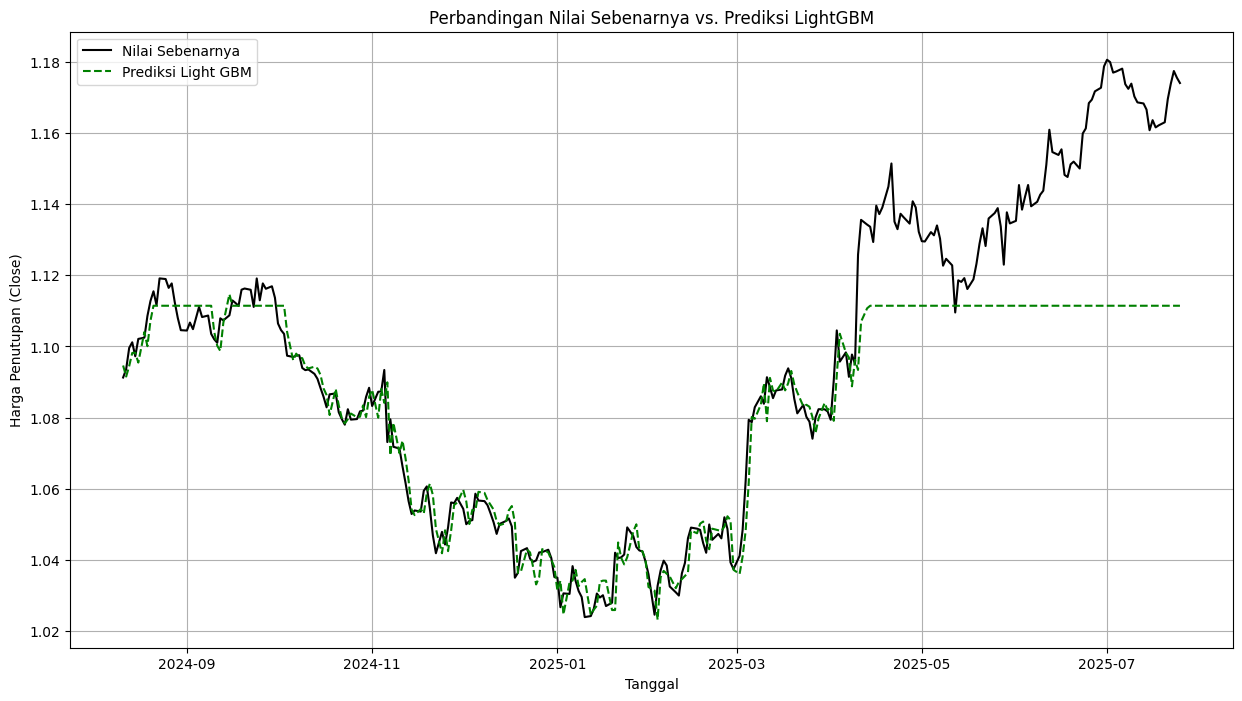

In [ ]:
plt.figure(figsize=(15, 8))
test_data = pd.DataFrame({'Nilai Sebenarnya': y_test_70, 'Prediksi Light GBM': y_pred_lgb}).sort_index()
plt.plot(test_data['Nilai Sebenarnya'], label='Nilai Sebenarnya', color='black')
plt.plot(test_data['Prediksi Light GBM'], label='Prediksi Light GBM', color='green', linestyle='--')
plt.title('Perbandingan Nilai Sebenarnya vs. Prediksi LightGBM')
plt.xlabel('Tanggal')
plt.ylabel('Harga Penutupan (Close)')
plt.legend()
plt.grid(True)
plt.show()

<!-- LIGHT GMB -->
<!-- Pembagian Dataset 80/20 -->

In [ ]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import time
import matplotlib.pyplot as plt


In [ ]:
file_path = '../Data/EURUSD.xlsx' 

try:
    df = pd.read_excel(file_path)
    print(f"File '{file_path}' berhasil dimuat. Jumlah baris awal: {len(df)}")
    df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
    df.set_index('Date', inplace=True)
except FileNotFoundError:
    print(f"Error: File '{file_path}' tidak ditemukan.")
    raise


File '../Data/EURUSD.xlsx' berhasil dimuat. Jumlah baris awal: 1001


In [ ]:
df['lag_1'] = df['Close'].shift(1)
df['lag_2'] = df['Close'].shift(2)
df['lag_3'] = df['Close'].shift(3)
df.dropna(inplace=True)
print(f"Data setelah feature engineering dan pembersihan. Jumlah baris: {len(df)}")


Data setelah feature engineering dan pembersihan. Jumlah baris: 998


In [ ]:
X = df[['lag_1', 'lag_2', 'lag_3']]
y = df['Close']


In [ ]:
train_size_80 = int(len(X) * 0.8)

X_train_80, X_test_80 = X[:train_size_80], X[train_size_80:]
y_train_80, y_test_80 = y[:train_size_80], y[train_size_80:]
print(f"Pembagian data 80/20: {len(X_train_80)} latih / {len(X_test_80)} uji")


Pembagian data 80/20: 798 latih / 200 uji


In [ ]:
print("\nMemulai pelatihan model LightGBM...")
lgb_model = lgb.LGBMRegressor(random_state=42)
start_time = time.time()
lgb_model.fit(X_train_80, y_train_80)
lgb_training_time = time.time() - start_time
print(f"Pelatihan LightGBM selesai dalam {lgb_training_time:.4f} detik.")



Memulai pelatihan model LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000037 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 798, number of used features: 3
[LightGBM] [Info] Start training from score 1.068435
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [ ]:
y_pred_lgb = lgb_model.predict(X_test_80)
results = {
    'Algoritma': ['Light GBM'],
    'MAE': [mean_absolute_error(y_test_80, y_pred_lgb)],
    'RMSE': [np.sqrt(mean_squared_error(y_test_80, y_pred_lgb))],
    'MAPE': [np.mean(np.abs((y_test_80 - y_pred_lgb) / y_test_80)) * 100],
    'R²': [r2_score(y_test_80, y_pred_lgb)],
    'Waktu Pelatihan': [lgb_training_time]
}
results_df = pd.DataFrame(results).set_index('Algoritma')
print("\n--- Laporan Kinerja Model LightGBM (80/20) ---")
print(results_df)



--- Laporan Kinerja Model LightGBM (80/20) ---
                MAE      RMSE      MAPE        R²  Waktu Pelatihan
Algoritma                                                         
Light GBM  0.016506  0.024773  1.444155  0.761536         0.033816


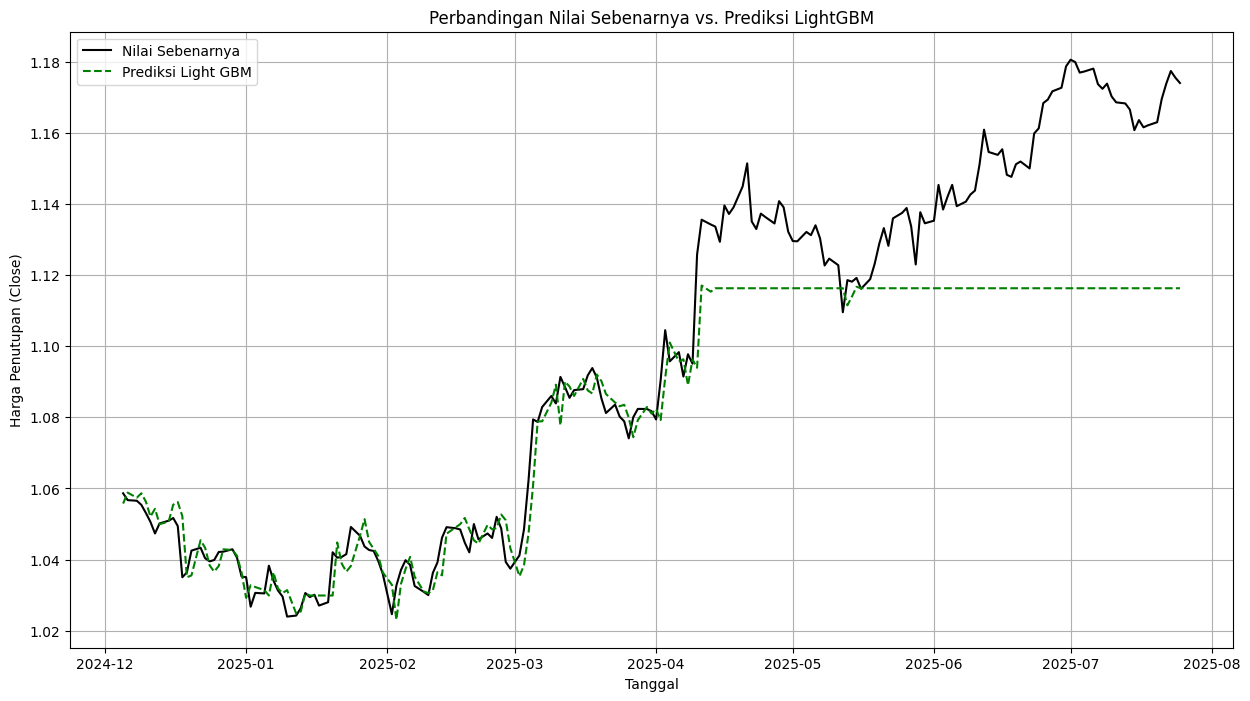

In [ ]:
plt.figure(figsize=(15, 8))
test_data = pd.DataFrame({'Nilai Sebenarnya': y_test_80, 'Prediksi Light GBM': y_pred_lgb}).sort_index()
plt.plot(test_data['Nilai Sebenarnya'], label='Nilai Sebenarnya', color='black')
plt.plot(test_data['Prediksi Light GBM'], label='Prediksi Light GBM', color='green', linestyle='--')
plt.title('Perbandingan Nilai Sebenarnya vs. Prediksi LightGBM')
plt.xlabel('Tanggal')
plt.ylabel('Harga Penutupan (Close)')
plt.legend()
plt.grid(True)
plt.show()